# Mini Projeto 1

## André Ejzenmesser
____

## Peso do coração dos gatos

Neste trabalho, deve ser estudado uma váriavel quantitativa, e no caso, a váriavel escolhida é o peso do coração dos gatos

In [88]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

In [89]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/AndreEjz/Desktop/CD/MiniProjeto1


In [90]:
#Importando a base de dados dos gatos
importando = pd.read_csv("cats.csv", sep=",")

In [91]:
gato = pd.DataFrame()

___
## Itens 1-4

In [92]:
gato['sexo'] = importando.Sex
gato['coracao'] = importando.Hwt
gato.head(15)

,sexo,coracao
0,F,7.0
1,F,7.4
2,F,9.5
3,F,7.2
4,F,7.3
5,F,7.6
6,F,8.1
7,F,8.2
8,F,8.3
9,F,8.5


In [102]:
pesos = []
for i in gato.coracao:
    pesos.append(i)
    
pesos.sort()

In [93]:
gato.describe()

,coracao
count,144.000000
mean,10.630556
std,2.434636
min,6.300000
25%,8.950000
50%,10.100000
75%,12.125000
max,20.500000


In [94]:
delta_i = (gato.coracao.max()-gato.coracao.min())/np.sqrt(144)

print(delta_i)

1.18333333333


In [95]:
#Aredondando o valor do delta
delta_i = 1.3

In [96]:
faixa = np.arange(6,22,delta_i)

In [97]:
faixa_peso = pd.cut(gato.coracao,faixa)
faixa_peso.value_counts()

(9.9, 11.2]     32
(8.6, 9.9]      32
(11.2, 12.5]    22
(7.3, 8.6]      19
(12.5, 13.8]    14
(6, 7.3]        10
(13.8, 15.1]     9
(15.1, 16.4]     3
(16.4, 17.7]     2
(20.3, 21.6]     1
(19, 20.3]       0
(17.7, 19]       0
Name: coracao, dtype: int64

In [122]:
pesos = pd.Series(data=sorted(gato.coracao))

In [120]:
pd.DataFrame.plot(kind='hist', data=pesos, bins=faixa, normed=True, legend=False)

TypeError: __init__() got an unexpected keyword argument 'kind'

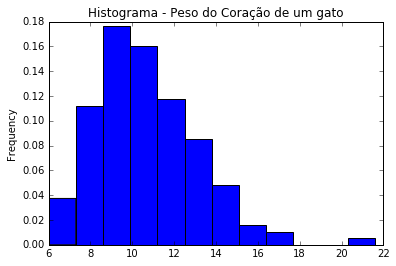

In [100]:
plot = gato.coracao.plot.hist(bins=faixa,title='Histograma - Peso do Coração de um gato',normed=True)

## Item 4

O histograma tem um comportamento de uma leve assimetria positiva pois,observando o histograma, é possível dizer que a mediana esta mais a direita que a média de todos os valores.

### Distribuições Teóricas
#### Primeira
   A primeira distribuição que descreve o comportamento do histograma é a <font color='red'>NORMAL</font> pois apesar de ter um ponto que distorce um pouco a curva, todo o resto dos valores se comportam com valores bem parecido com o de uma normal.
   <img src="normal.png">
#### Segunda
   A segunda distribuição que descreve o comportamento do histograma é a <font color='red'>GAMA</font> pois seu comportamento também é bem parecido com a do histograma, porém ela no começo sobe até o valor máximo e depois desce e vai ganhando um comportamento tendendo a zero, e podendo se igualar a zero.
   <img src="gama.png">

___
## Itens 5-11

### Item 5

Caso seja a função normal, os valores dos parâmetros serão algo próximo de 10 que é onde a média deve estar e o outro parâmetro será o desvio padrão calculado, elevado ao quadrado, resultando assim na variância.

Caso seja a função gama, os valores dos parâmetros serão os de inclinação e o formato da função, para estimar eles, é necessário utilizar (suponde que os parametros sejam a e b) a*b=média

Supondo que a = 1,1

In [104]:
#Função normal
media = sum(pesos)/len(pesos)

#Calculando a variância
soma = 0
for i in pesos:
    soma+=(i-media)**2
n = len(pesos)
variancia = soma/n
print('Média:',media,'\nVariância:',variancia)

Média: 10.6305555556 
Variância: 5.88628858025


In [105]:
#Função gama
# k para a gamma é escolhido entre 1 e 2 baseado na forma do histograma e no efeito que k tem na forma da gamma
a = 1.1

# Estimamos theta da distribuição gamma
b = media/a

print(b)

9.66414141414


___
### Item 6

#### Para a curva normal:

In [108]:
param_normal = stats.norm.fit(pesos)
param_normal

(10.630555555555553, 2.4261674674776499)

#### Para a curva gama:

In [109]:
param_gama = stats.gamma.fit(pesos)
param_gama

(5.1257827238483387, 5.0996000722441401, 1.0790468867010226)

___
### Item 7

Usando os valores obido no item 6

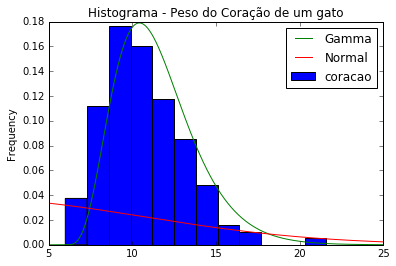

In [54]:
x = np.linspace(5, 25, 10000)

gato.coracao.plot.hist(bins=faixa,title='Histograma - Peso do Coração de um gato',normed=True)
normal = stats.norm.pdf(x, scale=param_normal[0])
gamma = stats.gamma.pdf(x, scale=param_gama[2], loc=6, a=param_gama[1])


plt.plot(x, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.plot(x, normal, '-', color='red', label="Normal") # Plota a normal teórica

plt.legend()




___
### Item 8

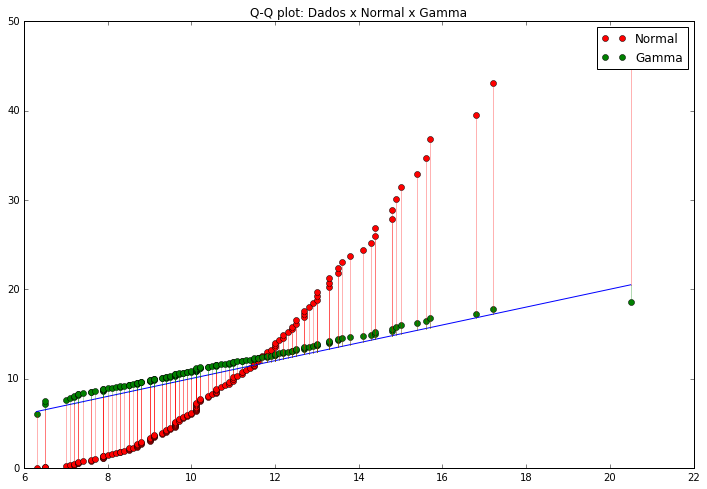

In [110]:
fra = [] # frequencia relativa acumulada
for i in range(len(pesos)):
    acc = (i - 0.5) / len(pesos)
    if acc < 0:
        acc = 0
    fra.append(acc)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_norm = stats.expon.ppf(fra, scale=media) # quantis teóricos da exponencial
q_gamma = stats.gamma.ppf(fra, scale=param_gama[2], loc=6, a=param_gama[1])


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Normal x Gamma")

norm_plot, = plt.plot(pesos, q_norm, 'o', color="red", label="Normal")
gamma_plot, = plt.plot(pesos, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[norm_plot, gamma_plot])
plt.plot((min(pesos), max(pesos)), (min(pesos), max(pesos)), '-')


for i in range(len(gato.coracao)):
    plt.plot((pesos[i], pesos[i]), (q_norm[i], pesos[i]), '-', color='red', alpha=0.3  )
    plt.plot((pesos[i], pesos[i]), (q_gamma[i], pesos[i]), '-', color='green', alpha=0.3  )




Esse gráfico mostra a diferença entre os quantis teóricos e os dados reais da distribuição analisada. Quanto mais distante o ponto estiver da reta real (reta azul no caso), mais distante estará a realidade do teórico.

##### Teste de aderência:

In [114]:
#Erro quadrático:
erro_quadratico_normal = sum((pesos - q_norm)**2)
erro_quadratico_gamma = sum((pesos - q_gamma)**2)

print("Erro quadrático da normal: {:4.3f}".format(erro_quadratico_normal))
print("Erro quadrático da gamma: {:4.3f}\n".format(erro_quadratico_gamma))

#Erro quadrático médio:
eqm_norm = erro_quadratico_normal/len(pesos)
eqm_gamma = erro_quadratico_gamma/len(pesos)

print("Erro quadratico médio da normal:", eqm_norm)
print("Erro quadratico médio da gamma:", eqm_gamma)

Erro quadrático da normal: 7714.114
Erro quadrático da gamma: 95.132

Erro quadratico médio da normal: 53.5702328991
Erro quadratico médio da gamma: 0.660637562026


De acordo com os dados analisados, fica claro que a diferença entre os dados e valores teróricos é menor quando se trata da curva de gamma. Com isso, é possível concluir que a curva gamma tem um comportamento mais adequado que a curva normal, neste caso. Ou seja, gamma tem mais aderência que a normal.

Para fazer a confirmação será usado também o método de soma de diferenças, visto a seguir:

In [116]:
soma_diferenças_normal = sum(abs(pesos - q_norm))
soma_diferenças_gamma = sum(abs(pesos - q_gamma))

print("Soma de diferenças da normal :", soma_diferenças_normal)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)

Soma de diferenças da normal : 814.971881497
Soma de diferenças da gamma : 115.198642024


Com o novo teste, ainda é possível perceber que a curva de gamma continua tendo mais aderência que a curva da normal.

___
### Item 9

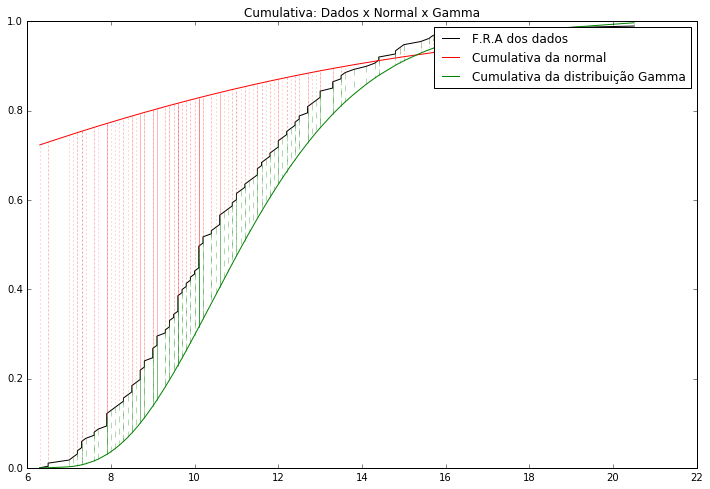

In [117]:
# fra e FDA
cdf_normal = stats.norm.cdf(pesos, scale=media) #FDA
cdf_gamma = stats.gamma.cdf(pesos, scale=param_gama[2], loc=6, a=param_gama[1])


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Normal x Gamma")

dados_fra_plot, = plt.plot(pesos, fra, '-', color='black', label="F.R.A dos dados")
cdf_norm_plot,   = plt.plot(pesos, cdf_normal, '-', color='red', label = "Cumulativa da normal")
cdf_gamma_plot, = plt.plot(pesos, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fra_plot, cdf_norm_plot, cdf_gamma_plot])


for i in range(len(gato.coracao)):
    plt.plot((pesos[i], pesos[i]), (fra[i], cdf_normal[i]), ':', color="red", alpha=0.3)   
    plt.plot((pesos[i], pesos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
    

___
### Item 10

In [123]:
# Erro quadrático nas CDFs
erro_quad_cdf_normal = sum((fra - cdf_normal)**2)

erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

print("Erro quadrático da CDF da Normal versus F.R.A", erro_quad_cdf_normal)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)

Erro quadrático da CDF da Normal versus F.R.A 25.0283159922
Erro quadrático da CDF da Gamma versus F.R.A 1.68614934351


Pelos dados observados, é possível concluir que como o erro quadrático é menor no caso gamma, ela então, é portanto a que oferece o melhor ajuste.

In [127]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_norm = max(abs(fra-cdf_normal))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))


print("Teste K-S para a normal com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=6 e a={:4.3f}: {:4.3f}:".format(media, ks_aderencia_norm, param_gama[2], param_gama[1], ks_aderencia_gamma))

Teste K-S para a normal com μ= 10.63: 0.728
Teste K-S para a gamma com scale=1.079, loc=6 e a=5.100: 0.185:
